In [11]:
#install.packages('fpp3')
#install.packages('dtwclust')
library(fpp3)
library(dtwclust)

In [52]:
#reading the data

sales_train_val_set <- readr::read_csv('sales_train_validation_afcs2021.csv')

sales_test_val_set <- readr::read_csv('sales_test_validation_afcs2021.csv')

sale_prices <- readr::read_csv('sell_prices_afcs2021.csv')

#sales_train_val <- readr::read_csv('sales_train_validation_afcs2021.csv')

#sales_train_val <- readr::read_csv('sales_train_validation_afcs2021.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  store_id = col_character(),
  item_id = col_character(),
  wm_yr_wk = col_double(),
  sell_price = col_double()
)



In [53]:
#transposing it so that the days are the rows and the columns are the different products
sales_train_val_set <- as.data.frame(t(as.matrix(sales_train_val_set)))

In [54]:
exploratory_data <- sales_train_val_set 
exploratory_data[1] 

,V1
,<fct>
id,FOODS_3_001_TX_3_validation
d_1,0
d_2,2
d_3,1
d_4,3
d_5,0
d_6,0
d_7,1
d_8,0


### We see that d_1 is equal to day 1 and D-2 day 2 etc., the ID is the ID of the product that is being sold. In this case the column 1 is the amount of items sold on that specific day. In the next blocks I will prepare the code so it can be plotted.

### The first thing is to make names of the column corresponding to the ID's of the items. 

### The second thing needed to do is make sure the date will be converted to actual dates instead of a code like d_1. The description of the data said the start date of the data is "2011-01-29" and the end date is "2016-06-19". The validation set consists of the first 1913 values of that so those are the days that will be implemented.  

In [55]:
header.true <- function(df) {
  names(df) <- as.character(unlist(df[1,]))
  df[-1,]
}

sales_train_val_set <- header.true(sales_train_val_set)

In [56]:
###### ONLY RUN THIS CODE ONCE ######

#getting the first 1913 days
all_days <- seq(as.Date("2011/1/29"), as.Date("2016/6/29"), "days")[0:1913]

#adding it to the dataframe
sales_train_val_set[['date']] = all_days 

#converting dataframe to tsibble
sales_train_val_set %>% as_tsibble()

Using `date` as index variable.



FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,FOODS_3_010_TX_3_validation,...,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,date
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<date>
0,0,0,0,0,0,27,0,0,0,...,9,3,0,7,0,0,0,0,0,2011-01-29
2,0,0,0,1,0,27,0,0,0,...,0,2,0,5,0,1,0,0,0,2011-01-30
1,0,0,0,1,0,8,0,0,0,...,3,1,0,5,0,0,0,0,0,2011-01-31
3,0,0,0,0,0,0,0,0,0,...,0,3,0,3,0,1,2,0,0,2011-02-01
0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2011-02-02
0,0,0,0,1,0,11,0,0,0,...,6,0,0,3,0,2,1,0,0,2011-02-03
1,0,0,0,2,0,8,0,0,0,...,1,1,0,0,0,0,0,0,0,2011-02-04
0,0,0,0,0,0,33,0,0,0,...,5,0,0,1,0,1,0,0,0,2011-02-05
2,0,0,0,0,0,16,0,0,0,...,0,1,0,7,0,1,1,0,0,2011-02-06


### Now that the tsibble object is made we can plot certain products. However the data is still in factor form, this needs to be converted te numeric. 

Using `date` as index variable.

Plot variable not specified, automatically selected `.vars = FOODS_3_001_TX_3_validation`



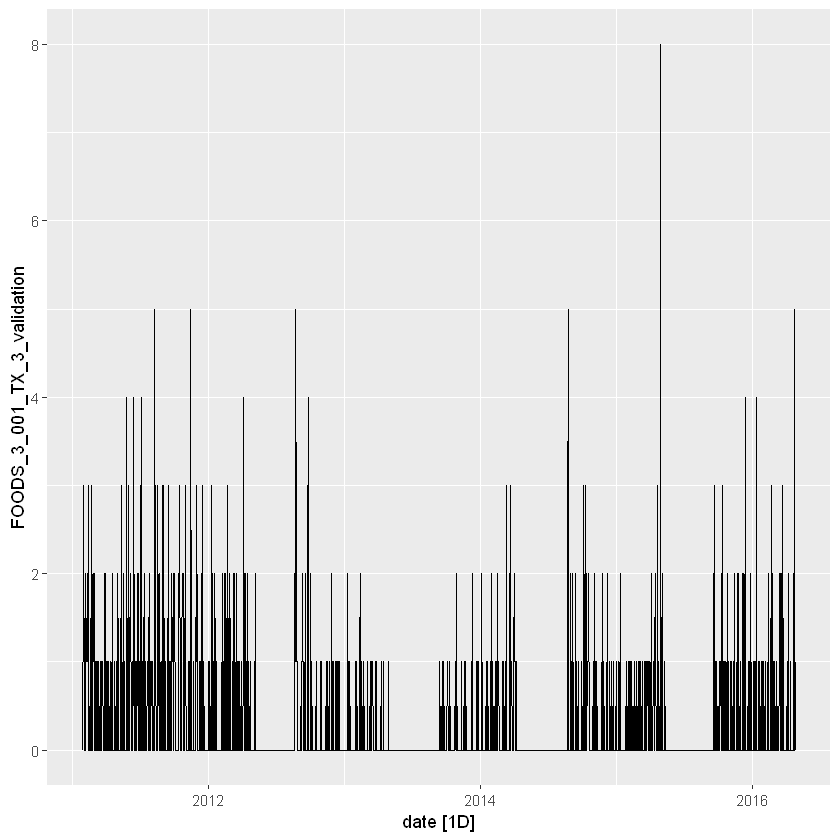

In [57]:
#get all columns that are of type factor
factor_columns <- sapply(sales_train_val_set, is.factor)
#change them from type factor to numeric so the numeric data can be plotted 
sales_train_val_set[factor_columns] <- lapply(sales_train_val_set[factor_columns], function(x) as.numeric(as.character(x)))                                 


#plotting the amount of sales per day of the first item 
sales_train_val_set %>%
    select(FOODS_3_001_TX_3_validation, date) %>%
    as_tsibble() %>% 
    autoplot()
               

### An STL decomposition is used to get more insight into the different timeseries. 

Using `date` as index variable.

Using `date` as index variable.



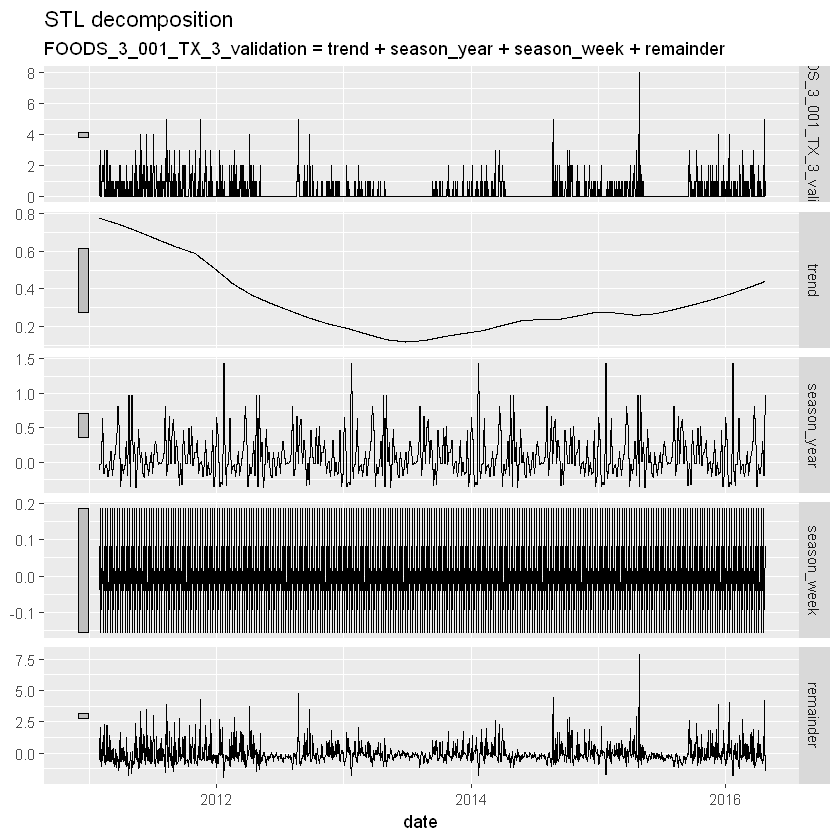

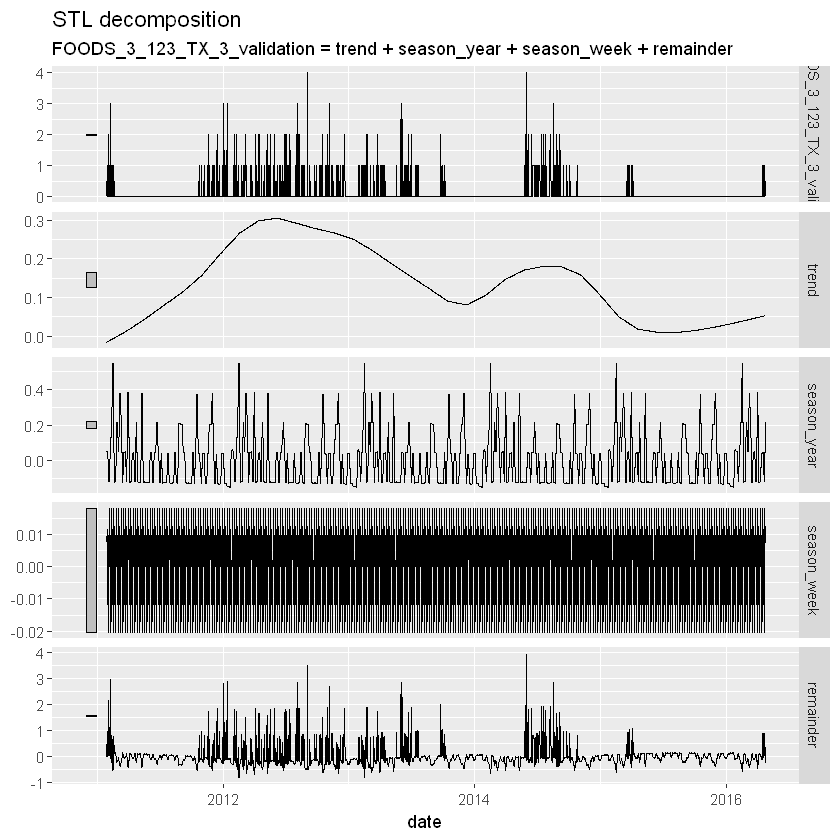

In [58]:
sales_train_val_set %>%
    select(FOODS_3_001_TX_3_validation, date) %>%
    as_tsibble() %>% 
    model(
        STL(FOODS_3_001_TX_3_validation ~ season(window = "periodic"))
        ) %>%
    components() %>%
        autoplot()

sales_train_val_set %>%
    select(FOODS_3_123_TX_3_validation, date) %>%
    as_tsibble() %>% 
    model(
        STL(FOODS_3_123_TX_3_validation ~ season(window = "periodic"))
        ) %>%
    components() %>%
        autoplot()

### In order to use a cluster model we need to do some preperation for the data, the cluster algorithm can take a few minutes (around 6 minutes for me) since it needs to cluster a 800 * 1900 dataframe (compare around 1.5 million integers). We still need to find the right parameters and find arguments why we chose certain parameters. 

In [137]:
#prepare the data to be clustered (removing the date column)
cluster_data <- t(sales_train_val_set[,(- ncol(sales_train_val_set))])

#save all the dates of the training data
train_dates <- sales_train_val_set[,(ncol(df_train_set))]


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,1,...,0,0,0,0,2,0,0,5,2,0
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,1,...,0,4,2,1,1,0,1,0,4,0
FOODS_3_006_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,1,1,1,0
FOODS_3_007_TX_3_validation,27,27,8,0,0,11,8,33,16,14,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_008_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_3_009_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,2,0,1,1,1,1,0,0,0,0
FOODS_3_010_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



	Precomputing distance matrix...

Iteration 1: Changes / Distsum = 823 / 1701094
Iteration 2: Changes / Distsum = 119 / 1540593
Iteration 3: Changes / Distsum =  1 / 1535581
Iteration 4: Changes / Distsum =  0 / 1535581

	Elapsed time is 458.77 seconds.



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


ERROR: Error in cbind(cluster_data, cluster = hc_sbd@cluster): object 'hc_sbd' not found


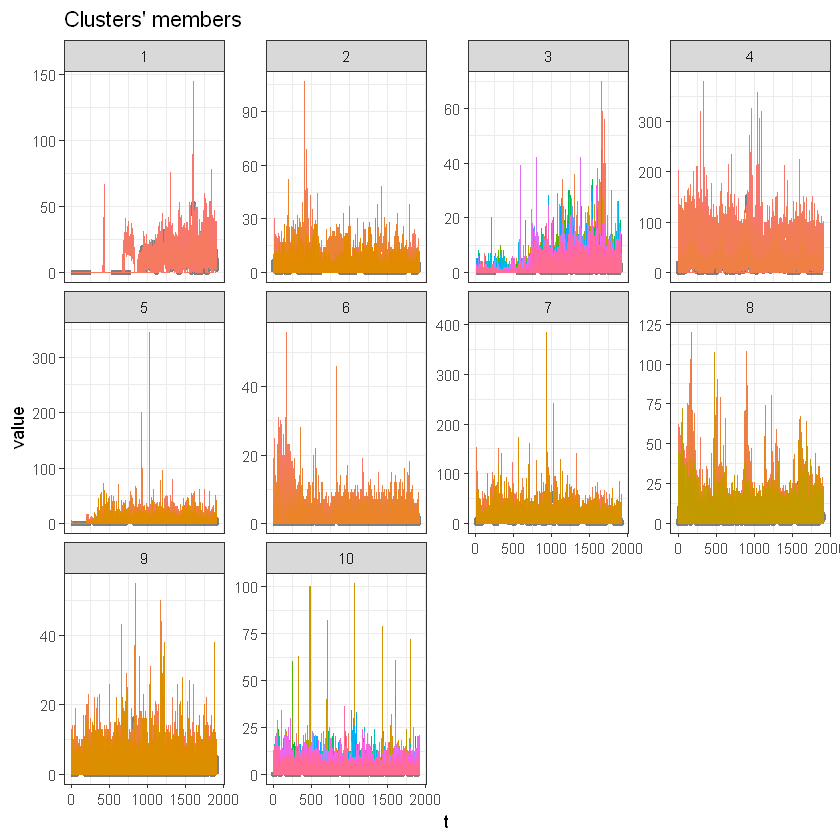

In [140]:
clusters <- tsclust(cluster_data, type = "partitional", k = 10L, 
              distance = "dtw_basic", centroid = "pam", 
              seed = 3247L, trace = TRUE,
              args = tsclust_args(dist = list(window.size = 100L)))

#plotting the clusters 
plot(clusters)

In [143]:
#saving the clusters 
cluster <- clusters@cluster

#add the corresponding cluster to the data 
sales_train_cluster_set <- cbind(cluster_data,cluster)

sales_train_cluster_set

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,cluster
FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,1,...,0,0,0,2,0,0,5,2,0,10
FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,3
FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,3
FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,1,...,4,2,1,1,0,1,0,4,0,10
FOODS_3_006_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,1,1,1,0,3
FOODS_3_007_TX_3_validation,27,27,8,0,0,11,8,33,16,14,...,0,0,0,0,0,0,0,0,0,7
FOODS_3_008_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
FOODS_3_009_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,3
FOODS_3_010_TX_3_validation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [144]:
clusters@centroids

[[1]]
   [1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [25]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [49]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [73]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [97]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [121]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [145]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [169]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [193]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [217]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [241]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [265]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [289]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [313]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [337]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [361]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [385]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [409]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [433]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [457]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [481]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [505]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [529]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [553]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [577]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [601]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [625]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [649]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [673]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [697]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [721]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [745]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [769]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [793]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [817]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [841]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [865]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [889]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [913]  0  0  0  8  9 12 10  9  8  6 14 11  8 16  9 14  6 11  9 11 15 16 11  6
 [937]  8  3 11 19  2  4  5  6 10 12 13 12  7  0 13  8  9 16 20 16 11  7 13  5
 [961] 11  8 11 16 11  4 12 14  8 13  3  2 10 10 10 13  6  8  7 13 10 14 23 12
 [985] 14  9 10 16 14 13 19  8 12  2 13 11  9 17  7  6  2 16 13 12  7 10  7 17
[1009] 15 12 10 20  8 10  9 17 11 17 12 14 12 11 14  9 14  4  4 11  7 10 17  6
[1033] 12 12  6  3  6 21 14 10 13 22  5 15 18 16  8 21  7 17 11 16 13 12  9 11
[1057] 13  8  8  6  8  0  6  9  7  7  6  5 14  5 12  9 17 18 15 10 17 12 20 23
[1081]  9 13 13 15 13 11 17 19  6 12  7  9 10 10 15  8  7  4 10 12 18 10 14 15
[1105] 11 19 14 16 18 15 15 12  0  1  4  2  0  7  4  8 10 14  1  6  1  9  4  3
[1129]  7 11  8 16  6  7 13 11 10 14  9 10  8  5  3 10  9  9 10 12  3  5  8  4
[1153]  8 15 11  7  8  1 10  5 11  8 12 14 18 11 17  9 20 11 19 11 16 10  7 12
[1177] 14 13 10  9  7  4  8  7 17 13 14 14  9 10  6  9 14 16 18 14 17 12  8 21
[1201]  8 12  7 13 20 11 23 15  9  8 11 11  